# CM50266 Applied Data Science
# Lab 1: Weather Visualisation

You are provided with four data files that contain daily values of outdoor temperature, indoor temperature +
humidity, barometric pressure and rainfall covering a year. They are in CSV format. They have been uploaded to the
unit Moodle page and can be found in lab1data.zip.

## Task1 (5 marks)

Write a python program to parse the CSV files. Read the data from the CSV files into an appropriate python data
structure. For the file handling part of this task you should NOT use an existing CSV reading and parsing library such
as PANDAS. Instead you should code the capability from scratch. You are recommended to structure your code to
allow re-use of the core parser as you may find it useful in the future. You may use libraries including PANDAS once
you have read the data, including to convert datatypes from their raw input type.


Your code should correctly parse the CSV file provided. If a file is read that does not conform to the variant of the
CSV file provided your program should not generate any unhandled exceptions.
Compute the minimum, maximum, mean and standard deviation for each component of the weather data and
report this. In task 2 you may wish to account for gaps or other issues in the data provided, but in task 1 you should
compute these values for all the data provided.


Using either a suitable python library to plot pairs of the data or Microsoft Excel, visually check for correlations
between the weather components.
Your program will be assessed according to the following criteria:


Assessment Criteria for Task 1:

* Does the program correctly parse the csv file into a python data structure? 1
* Does the program correctly deal with mal-formed input, that is avoid throwing unhandled exceptions? 1
* Is the code that reads the csv file wrapped in a function that takes a filename as input and returns the data? And does it not make use of any existing csv reading and parsing library such as Pandas for the file handling? 1
* Does the program correctly output the minimum, maximum, mean and standard deviation for each component? 1
* Has a complete set of plots been provided to allow identification of correlations between variables. 1

# File Parser

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
def weatherFileParser(filename):
    """Enter a filename to parse the csv into a dictionary"""
    
    path = 'lab1-data'
    filePath = path+'/'+filename
    
    # Opens the file in the correct encoding
    with open(filePath, 'r', encoding='utf-8-sig') as dataFile:
        
        # Assign the appropriate header for the corresponding filename
        if filename == 'barometer-last-year.csv':
            header = ['DateTime', 'barometerBaro']
            numofFields = 2
            
        elif filename == 'indoor-temperature-last-year.csv':
            header = ['DateTime', 'indoorHumidity', 'indoorTemperature', 'indoorTemperature_range (low)', 'indoorTemperature_range (high)']
            numofFields = 5
            
        elif filename == 'outside-temperature-last-year.csv':
            header = ['DateTime', 'outsideTemperature', 'outsideTemperature_range (low)', 'outsideTemperature_range (high)']
            numofFields = 4

        elif filename == 'rainfall-last-year.csv':
            header = ['DateTime', 'rainfallmm']
            numofFields = 2
        
        # Reads the first line to cheack if it is a header, if it is, it skips the first line
        headerCheck = dataFile.readline()
        records = []
        
        if 'DateTime' not in headerCheck:
            # Checks if number of fields match the ones expected.
            assert len(headerCheck.strip().replace('"','').split(',')) == numofFields, 'Missmatch between the number of elements & fields expected'
            records.append(headerCheck.strip().replace('"','').split(','))  
                
        for line in dataFile.readlines():
            # Checks if number of fields match the ones expected.
            assert len(line.strip().replace('"','').split(',')) == numofFields, 'Missmatch between the number of elements & fields expected'
            records.append(line.strip().replace('"','').split(','))
                
        data = {}
        for component in header:
             data[component] = []
        
        for record in records:
            for i, field in enumerate(record):
                # Check if its the first field
                if field == record[0]:
                    # Check for the date format
                    try:
                        datetime.datetime.strptime(field, '%Y-%m-%d %H:%M:%S')
                        data[header[i]].append(field)

                    except ValueError:
                        print('Different date string format than the one expected')
                        raise
                        
                else:
                    # Checks for empty field
                    assert field != '', 'Empty field present'
                    
                    # Checks if the values in the numberic fields can be converted from string to float
                    try:
                        float(field)
                        data[header[i]].append(float(field))

                    except ValueError:
                        print('Unexpected value in a numeric field')
                        raise
                    
    
    return data

# Computing min,max,mean and std for each component

In [3]:
barometerData = weatherFileParser('barometer-last-year.csv')
indoorTempData = weatherFileParser('indoor-temperature-last-year.csv')
outsideTempData = weatherFileParser('outside-temperature-last-year.csv')
rainfallData = weatherFileParser('rainfall-last-year.csv')

# ----------------------------------------
DFbarometerData = pd.DataFrame.from_dict(barometerData)
print('Barometer Baro | Minimum:', DFbarometerData['barometerBaro'].min())
print('Barometer Baro | Maximum:', DFbarometerData['barometerBaro'].max())
print('Barometer Baro | Mean:', round(DFbarometerData['barometerBaro'].mean(),1))
print('Barometer Baro | Standard Deviation:', round(DFbarometerData['barometerBaro'].std(),1))
print('\n----------------------------------------\n')

# ----------------------------------------
DFindoorTempData = pd.DataFrame.from_dict(indoorTempData)

print('Indoor Humidity | Minimum:', DFindoorTempData['indoorHumidity'].min())
print('Indoor Humidity | Maximum:', DFindoorTempData['indoorHumidity'].max())
print('Indoor Humidity | Mean:', round(DFindoorTempData['indoorHumidity'].mean(),1))
print('Indoor Humidity | Standard Deviation:', round(DFindoorTempData['indoorHumidity'].std(),1))
print()

print('Indoor Temperature | Minimum:', DFindoorTempData['indoorTemperature'].min())
print('Indoor Temperature | Maximum:', DFindoorTempData['indoorTemperature'].max())
print('Indoor Temperature | Mean:', round(DFindoorTempData['indoorTemperature'].mean(),1))
print('Indoor Temperature | Standard Deviation:', round(DFindoorTempData['indoorTemperature'].std(),1))
print('\n----------------------------------------\n')

# ----------------------------------------
DFoutsideTempData = pd.DataFrame.from_dict(outsideTempData)

print('Outside Temperature | Minimum:', DFoutsideTempData['outsideTemperature'].min())
print('Outside Temperature | Maximum:', DFoutsideTempData['outsideTemperature'].max())
print('Outside Temperature | Mean:', round(DFoutsideTempData['outsideTemperature'].mean(),1))
print('Outside Temperature | Standard Deviation:', round(DFoutsideTempData['outsideTemperature'].std(),1))
print('\n----------------------------------------\n')

# ----------------------------------------
DFrainfallData = pd.DataFrame.from_dict(rainfallData)

print('Rainfall mm | Minimum:', DFrainfallData['rainfallmm'].min())
print('Rainfall mm | Maximum:', DFrainfallData['rainfallmm'].max())
print('Rainfall mm | Mean:', round(DFrainfallData['rainfallmm'].mean(),1))
print('Rainfall mm | Standard Deviation:', round(DFrainfallData['rainfallmm'].std(),1))

Barometer Baro | Minimum: 979.6
Barometer Baro | Maximum: 1035.6
Barometer Baro | Mean: 1010.0
Barometer Baro | Standard Deviation: 9.9

----------------------------------------

Indoor Humidity | Minimum: 37.0
Indoor Humidity | Maximum: 59.0
Indoor Humidity | Mean: 48.5
Indoor Humidity | Standard Deviation: 5.2

Indoor Temperature | Minimum: 18.04
Indoor Temperature | Maximum: 29.21
Indoor Temperature | Mean: 21.8
Indoor Temperature | Standard Deviation: 2.1

----------------------------------------

Outside Temperature | Minimum: -1.81
Outside Temperature | Maximum: 26.38
Outside Temperature | Mean: 11.1
Outside Temperature | Standard Deviation: 5.4

----------------------------------------

Rainfall mm | Minimum: 0.0
Rainfall mm | Maximum: 23.2
Rainfall mm | Mean: 1.5
Rainfall mm | Standard Deviation: 3.3


# Plotting

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Removed unused columnds from the dataframe
if 'indoorTemperature_range (low)' and 'indoorTemperature_range (high)' in DFindoorTempData:
    del DFindoorTempData['indoorTemperature_range (low)']
    del DFindoorTempData['indoorTemperature_range (high)']

if 'outsideTemperature_range (low)' and 'outsideTemperature_range (high)' in DFoutsideTempData:
    del DFoutsideTempData['outsideTemperature_range (low)']
    del DFoutsideTempData['outsideTemperature_range (high)']


# Merging all of the dataframes with an outerjoin on the DateTime column.
DFmerged = pd.merge(DFbarometerData, DFindoorTempData, on='DateTime', how='outer')
DFmerged = pd.merge(DFmerged, DFoutsideTempData, on='DateTime', how='outer')
DFmerged = pd.merge(DFmerged, DFrainfallData, on='DateTime', how='outer')

# Removed the DateTime which will not be used as we only need the components
if 'DateTime' in DFmerged:
    del DFmerged['DateTime']

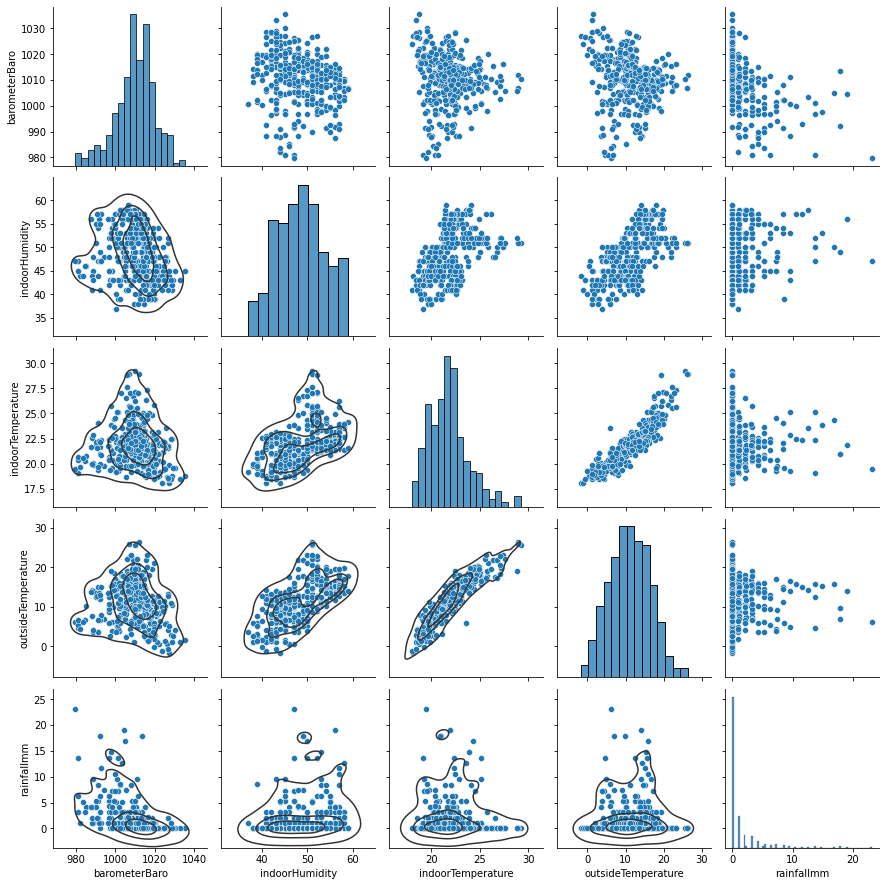

In [6]:
# Plotting all of pairs of the 5 weather components to observe for correlations between them
# Reference
# https://seaborn.pydata.org/generated/seaborn.pairplot.html

g = sns.pairplot(DFmerged)

# Kernel Density Estimate (KDE) can be used to visualize the distribution of observations in the weather component dataset
g.map_lower(sns.kdeplot, levels=4, color=".2")

## Task 2 (5 marks)

Extend your code to summarise the data into monthly and seasonable values (min, max, mean and SD, or mean and
confidence intervals) for the weather components Humidity, Indoor Temperature, Outdoor Temperature, Rainfall
and Barometer. From this summary data construct two infographics (one monthly and one seasonal). These 
infographics should visualise the summarised data concisely and clearly. You should incorporate any additional data
into your infographic that helps you to convey a clear and interesting message for the reader.

Your infographics will be assessed according to the following criteria:


Assessment Criteria for Task 2 

* Do both of the infographics illustrate the required summary data (either min, max, mean, SD, or mean and confidence intervals) for the weather components Humidity, Indoor Temperature, Outdoor Temperature, Rainfall and Barometer without misrepresenting the data? 1
* Do the infographics employ effective visual mappings (encodings of data as visual properties) according to Mackinlay’s ranking of visual properties, and are these visual mappings justified in a short explanation to accompany the infographic? 1
* Do the infographics enable effective (fast and accurate) comparisons between monthly and seasonal values? (i.e. The data should be visualised such that it makes comparisons easy to perform – tables are not effective) 1
* Do the infographics use colour effectively to draw attention and encode data, and is the use of colour justified in a short explanation to accompany the infographic? 1
* Do the infographics integrate text/labels effectively without adding unnecessary ‘chart junk’? 1

# Data Wrangling

In [7]:
# Merging again all of the dataframes with an outerjoin on the DateTime column.
DFmerged2 = pd.merge(DFbarometerData, DFindoorTempData, on='DateTime', how='outer')
DFmerged2 = pd.merge(DFmerged2, DFoutsideTempData, on='DateTime', how='outer')
DFmerged2 = pd.merge(DFmerged2, DFrainfallData, on='DateTime', how='outer')

# Converting Pandas Column to datetime
DFmerged2['DateTime'] = pd.to_datetime(DFmerged2['DateTime'])
# Creating a new column that has the month for each record
DFmerged2['month'] = DFmerged2['DateTime'].apply(lambda t: t.month)

# Check if dataframe has null values and if so, fill them with them for the appropriate component with the mean of the corresponding month
if DFmerged2.isnull().any().sum() != 0:

    # Find indexes of rows that have missing values
    missingValIndex = DFmerged2.index[DFmerged2.isnull().any(axis=1)]
    dfHeader = list(DFmerged2.columns.values)

    # Iterating through the indexes and each column to fill each NaN with the average of the component for that specific month
    for index in missingValIndex:
        for column in dfHeader:
            if pd.isna(DFmerged2[column][index]):
                NaNcomponentMean = round(DFmerged2[column][DFmerged2['month']==DFmerged2['month'][index]].mean(),1)
                DFmerged2.loc[index, column]= NaNcomponentMean


# Creating a new DataFrame to be used from plotting the Monthly/Seasonal Averages for each component                

months = DFmerged2['month'].unique().tolist()

InformaticsData = {}
columnNames = ['barometerBaro', 'indoorHumidity', 'indoorTemperature', 'outsideTemperature', 'rainfallmm']
InformaticsColumns = ['barometerBaroMean', 'barometerBaroCI', 'indoorHumidityMean', 'indoorHumidityCI', 'indoorTemperatureMean', 'indoorTemperatureCI', 'outsideTemperatureMean', 'outsideTemperatureCI', 'rainfallmmMean', 'rainfallmmCI', 'season']

InformaticsData['month'] = months
for column in InformaticsColumns:
    InformaticsData[column] = []

ZValue = 1.96
# Iterate through each month and component and add the season and monthly averages
for month in months:
    
    if month in [1,2,12]:
        InformaticsData['season'].append('Winter')
    elif month in [3,4,5]:
        InformaticsData['season'].append('Spring')
    elif month in [6,7,8]:
        InformaticsData['season'].append('Summer')
    elif month in [9,10,11]:
        InformaticsData['season'].append('Autumn')
    
    for column in columnNames:
        
        mean = DFmerged2[column][DFmerged2['month']==month].mean()
        std = DFmerged2[column][DFmerged2['month']==month].std()
        count = DFmerged2[column][DFmerged2['month']==month].count()

        CI = ZValue * (std / count**0.5)
        
        InformaticsData[column+'Mean'].append(round(mean, 1))
        InformaticsData[column+'CI'].append(round(CI, 1))

    
DFInformaticsData = pd.DataFrame.from_dict(InformaticsData)
DFInformaticsData = DFInformaticsData.sort_values(by='month')

# Change month integer to the Month's first 3 letters
# Reference
# https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name
DFInformaticsData['month'] = pd.to_datetime(DFInformaticsData['month'], format='%m').dt.month_name().str.slice(stop=3)

print(DFInformaticsData)

   month  barometerBaroMean  barometerBaroCI  indoorHumidityMean  \
3    Jan             1015.4              3.5                42.5   
4    Feb             1005.8              4.8                43.2   
5    Mar             1006.5              4.1                46.3   
6    Apr             1015.4              2.8                43.7   
7    May             1008.9              2.7                45.1   
8    Jun             1006.1              2.7                51.5   
9    Jul             1006.7              2.2                53.0   
10   Aug             1009.1              1.4                57.0   
11   Sep             1005.8              2.8                55.2   
0    Oct             1013.3              2.7                52.7   
1    Nov             1007.4              4.7                48.1   
2    Dec             1018.8              2.4                45.9   

    indoorHumidityCI  indoorTemperatureMean  indoorTemperatureCI  \
3                1.0                   19.6    

# Plotting Each Component Monthly

[(1000.0, 1023.0)]

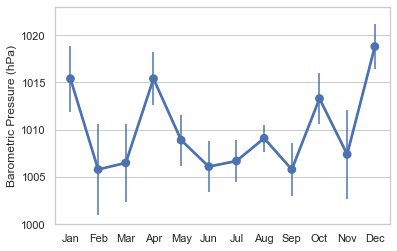

In [8]:
sns.set_theme(style="whitegrid")

baroChart = sns.pointplot(x='month', y="barometerBaroMean", data=DFInformaticsData, linewidth = 3)
plt.errorbar(DFInformaticsData['month'], DFInformaticsData['barometerBaroMean'], yerr=DFInformaticsData['barometerBaroCI'].values)
# baroChart.set_title('Montly Average of Baromentric Pressure with 95% Confidence Interval')
baroChart.set(xlabel='', ylabel='Barometric Pressure (hPa)')
baroChart.set(ylim=(1000, 1023))

[(40.0, 60.0)]

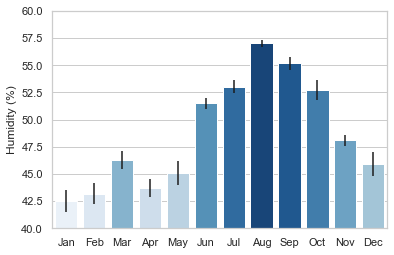

In [9]:
# Reference
# https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
data = np.array(DFInformaticsData['indoorHumidityMean'])
pal = sns.color_palette("Blues_r", len(data))
rank = data.argsort().argsort()

indoorHumidityChart = sns.barplot(x='month', y="indoorHumidityMean", data=DFInformaticsData, yerr=DFInformaticsData['indoorHumidityCI'].values, palette=np.array(pal[::-1])[rank])
# indoorHumidityChart.set_title('Montly Average of Humidity Percentage with 95% Confidence Interval')
indoorHumidityChart.set(xlabel='', ylabel='Humidity (%)')
indoorHumidityChart.set(ylim=(40, 60))

[(18.0, 26.0)]

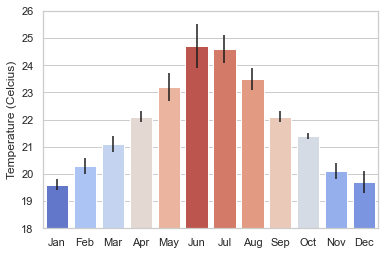

In [10]:
data = np.array(DFInformaticsData['indoorTemperatureMean'])
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

indoorTemperatureChart = sns.barplot(x='month', y="indoorTemperatureMean", data=DFInformaticsData, yerr=DFInformaticsData['indoorTemperatureCI'].values, palette=np.array(pal[::1])[rank])
# indoorTemperatureChart.set_title('Montly Average of Indoor Temperature with 95% Confidence Interval')
indoorTemperatureChart.set(xlabel='', ylabel='Temperature (Celcius)')
indoorTemperatureChart.set(ylim=(18, 26))

[Text(0, 0.5, 'Temperature (Celcius)'), Text(0.5, 0, '')]

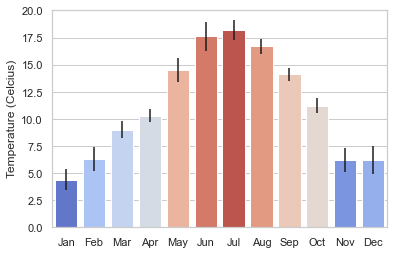

In [11]:
data = np.array(DFInformaticsData['outsideTemperatureMean'])
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

outsideTemperatureChart = sns.barplot(x='month', y="outsideTemperatureMean", data=DFInformaticsData, yerr=DFInformaticsData['outsideTemperatureCI'].values, palette=np.array(pal[::1])[rank])
# outsideTemperatureChart.set_title('Montly Average of Outside Temperature')
outsideTemperatureChart.set(xlabel='', ylabel='Temperature (Celcius)')

[Text(0, 0.5, 'Rainfall (mm)'), Text(0.5, 0, '')]

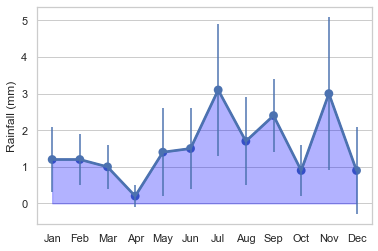

In [12]:
rainfallmmChart = sns.pointplot(x='month', y="rainfallmmMean", data=DFInformaticsData, linewidth = 3)
rainfallmmChart.fill_between(DFInformaticsData['month'],DFInformaticsData['rainfallmmMean'], color="blue", alpha=0.3)
plt.errorbar(DFInformaticsData['month'], DFInformaticsData['rainfallmmMean'], yerr=DFInformaticsData['rainfallmmCI'].values)
# rainfallmmChart.set_title('Montly Average of Rainfall with 95% Confidence Interval')
rainfallmmChart.set(xlabel='', ylabel='Rainfall (mm)')

# Plotting Each Component Seasonally

[(1000.0, 1018.0)]

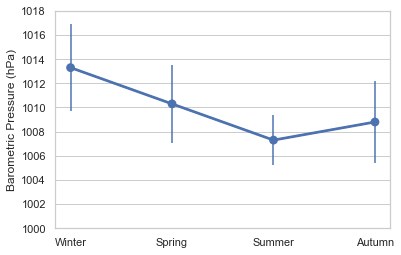

In [13]:
Seasons = DFInformaticsData['season'].unique()
BarometerAvgs = [round(DFInformaticsData['barometerBaroMean'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]
BarometerCIAvgs = [round(DFInformaticsData['barometerBaroCI'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]

baroChartSeason = sns.pointplot(x=Seasons, y=BarometerAvgs)
plt.errorbar(Seasons, BarometerAvgs, yerr=BarometerCIAvgs)

# baroChartSeason.set_title('Seasonal Average of Baromentric Pressure with 95% Confidence Interval')
baroChartSeason.set(ylabel='Barometric Pressure (hPa)')
baroChartSeason.set(ylim=(1000, 1018))

[(40.0, 55.0)]

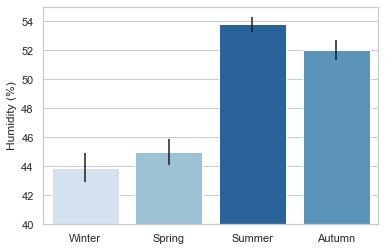

In [14]:
indoorHumidityAvgs = [round(DFInformaticsData['indoorHumidityMean'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]
indoorHumidityCIAvgs = [round(DFInformaticsData['indoorHumidityCI'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]

data = np.array(indoorHumidityCIAvgs)
pal = sns.color_palette("Blues_r", len(data))
rank = data.argsort().argsort()

indoorHumidityChartSeason = sns.barplot(x=Seasons, y=indoorHumidityAvgs, yerr=indoorHumidityCIAvgs, palette=np.array(pal[::1])[rank])
# indoorHumidityChartSeason.set_title('Seasonal Average of Humidity Percentage with 95% Confidence Interval')
indoorHumidityChartSeason.set(xlabel='', ylabel='Humidity (%)')
indoorHumidityChartSeason.set(ylim=(40, 55))

[(18.0, 25.0)]

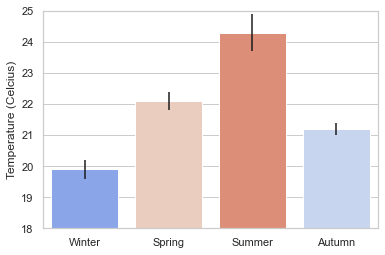

In [15]:
indoorTemperatureAvgs = [round(DFInformaticsData['indoorTemperatureMean'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]
indoorTemperatureCIAvgs = [round(DFInformaticsData['indoorTemperatureCI'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]

data = np.array(indoorTemperatureAvgs)
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

indoorTemperatureChartSeason = sns.barplot(x=Seasons, y=indoorTemperatureAvgs, yerr=indoorTemperatureCIAvgs, palette=np.array(pal[::1])[rank])
# indoorTemperatureChartSeason.set_title('Seasonal Average of Indoor Temperature with 95% Confidence Interval')
indoorTemperatureChartSeason.set(xlabel='', ylabel='Temperature (Celcius)')
indoorTemperatureChartSeason.set(ylim=(18, 25))

[Text(0, 0.5, 'Temperature (Celcius)'), Text(0.5, 0, '')]

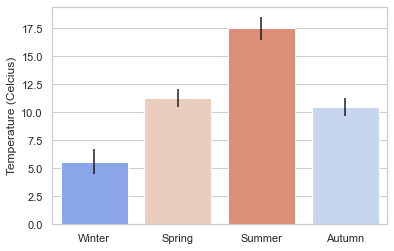

In [16]:
outsideTemperatureAvgs = [round(DFInformaticsData['outsideTemperatureMean'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]
outsideTemperatureCIAvgs = [round(DFInformaticsData['outsideTemperatureCI'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]

data = np.array(outsideTemperatureAvgs)
pal = sns.color_palette("coolwarm", len(data))
rank = data.argsort().argsort()

outsideTemperatureChartSeason = sns.barplot(x=Seasons, y=outsideTemperatureAvgs, yerr=outsideTemperatureCIAvgs, palette=np.array(pal[::1])[rank])
# outsideTemperatureChartSeason.set_title('Seasonal Average of Outside Temperature with 95% Confidence Interval')
outsideTemperatureChartSeason.set(xlabel='', ylabel='Temperature (Celcius)')

[(0.0, 4.0)]

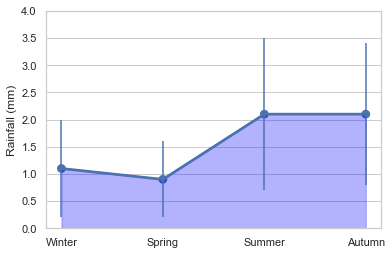

In [17]:
rainfallmmAvgs = [round(DFInformaticsData['rainfallmmMean'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]
rainfallmmCIAvgs = [round(DFInformaticsData['rainfallmmCI'][DFInformaticsData['season']==season].mean(), 1) for season in Seasons]

rainfallmmChartSeason = sns.pointplot(x=Seasons, y=rainfallmmAvgs, data=DFInformaticsData, linewidth = 3)
rainfallmmChartSeason.fill_between(Seasons,rainfallmmAvgs, color="blue", alpha=0.3)

plt.errorbar(Seasons, rainfallmmAvgs, yerr=rainfallmmCIAvgs)
# rainfallmmChartSeason.set_title('Seasonal Average of Rainfall with 95% Confidence Interval')
rainfallmmChartSeason.set(xlabel='', ylabel='Rainfall (mm)')
rainfallmmChartSeason.set(ylim=(0, 4))